In [71]:
# Load packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.metrics import silhouette_samples
color = sns.color_palette()
%matplotlib inline

In [72]:
# Load dataset
players = pd.read_csv('/Users/Xuhuiz2/Desktop/nba_2017_players_with_salary_wiki_twitter.csv', index_col = 0)
players.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


In [73]:
k_means = KMeans(n_clusters = 3)

In [74]:
cluster_source = players.loc[:,["POINTS", "WINS_RPM"]]

In [75]:
kmeans = k_means.fit(cluster_source)

In [76]:
players['cluster'] = kmeans.labels_

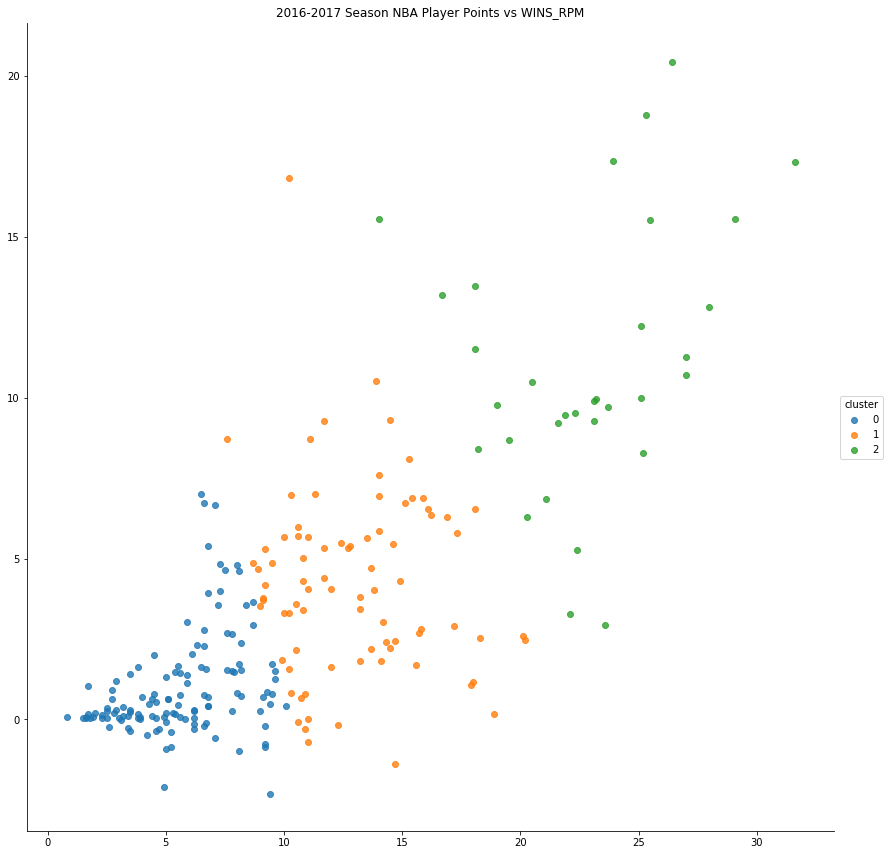

In [77]:
ax = sns.lmplot(x="POINTS", y="WINS_RPM", data=players,hue="cluster", size=12, fit_reg=False)
ax.set(xlabel='', ylabel='', title="2016-2017 Season NBA Player Points vs WINS_RPM")

In [78]:
from ggplot import *

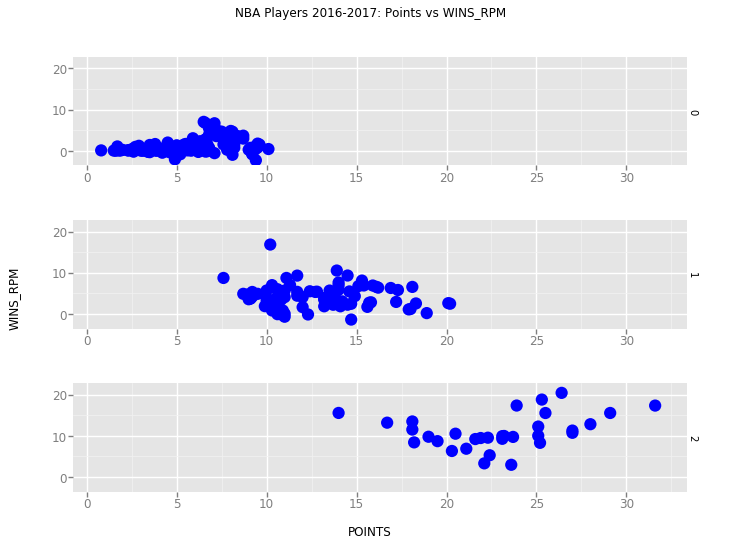

<ggplot: (7542292158)>

In [79]:
# Facet plot Kmeans
keans_plot = ggplot(players,aes(x = 'POINTS', y = 'WINS_RPM')) + geom_point(size=150, color = 'blue') + facet_grid('cluster')
keans_plot + xlab("") + ylab("") + ggtitle("NBA Players 2016-2017: Points vs WINS_RPM")

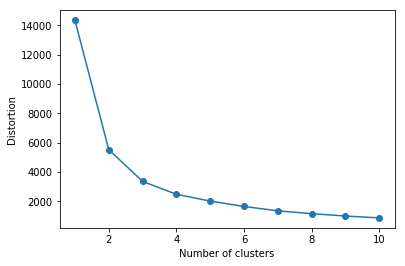

In [80]:
# Elbow method: k = 4 is better
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               n_init = 10,
               max_iter = 300,
               random_state = 0)
    km.fit(cluster_source)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

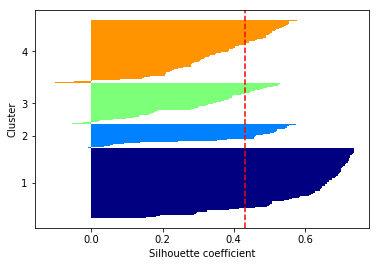

In [81]:
# silhouette plot
km = KMeans(n_clusters = 4,
            init = 'k-means++',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state = 0)
y_km = km.fit_predict(cluster_source)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(cluster_source,
                                     y_km,
                                     metric = 'euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height = 1.0,
             edgecolor = 'none',
             color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color = 'red',
            linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()